# Библиотека pandas

__pandas__ — программная библиотека на языке Python для обработки и анализа данных. Работа pandas с данными строится поверх библиотеки NumPy, являющейся инструментом более низкого уровня. Предоставляет специальные структуры данных и операции для манипулирования числовыми таблицами и временны́ми рядами.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/640px-Pandas_logo.svg.png)

Установка pandas

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import numpy as np

Подгрузка файла в csv


In [ ]:
data = pd.read_csv('/content/titanic.csv', sep=',')

Вывод табличных данных

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Вывод статистических характеристик

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Узнаем размерность данных

In [ ]:
print(f'Рамерность наших данных составляет {data.shape[0]} строк и {data.shape[1]} столбцов')

Рамерность наших данных составляет 891 строк и 12 столбцов


Выбираем только числовые столбцы

In [ ]:
data_numeric = data.select_dtypes(include='number')
data_numeric.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Получение информации о датасете

In [ ]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


Избавление от неинформативных признаков

In [ ]:
data_numeric['PassengerId'].value_counts()

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

Удаление столбца из данных

In [ ]:
data_numeric = data_numeric.drop(['PassengerId'], axis=1)
data_numeric.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


Надем сколько в среднем человек заплатил за проезд

In [ ]:
mean_fare = data_numeric['Fare'].mean()
print(f'Средняя стоимость проезда на Титанике по имеющимся данным составляет {round(mean_fare)} фунта')

Средняя стоимость проезда на Титанике по имеющимся данным составляет 32 фунта


Посмотрим соотношение выживших в умершим

In [ ]:
data_numeric['Survived'].value_counts(normalize=True) # в измерениях от 0 до 1

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Судя по полученным данным, почти 62% пассажиров Титаника не смогли спастись, в то время как спасшихся всего 38%, или 342 человека из 891 указанного

Получим информацию о классах обслуживания

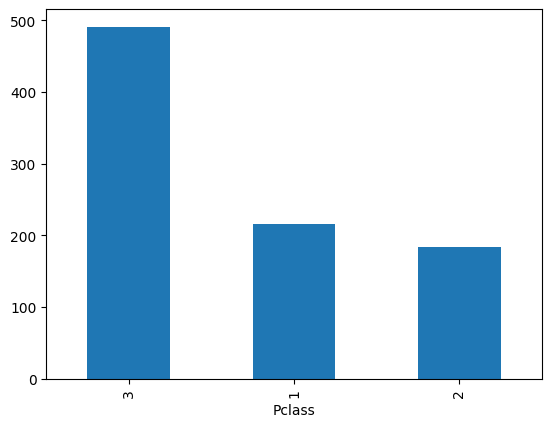

In [ ]:
data_numeric['Pclass'].value_counts().plot(kind='bar'); # plot - визуализация, kind - вид диаграммы, bar - столбчатая диаграмма

По полученному графику видно, что наибольшее число пассажировал обслуживались в 3 классе, чуть менее - в 1, а наименьшее число гостей выбрало 2 класс

Теперь получим информацию о возрасте пассажиров


![](https://help.fsight.ru/ru/mergedProjects/uidiagrams/type_diagrams/type_pics/candle.png)

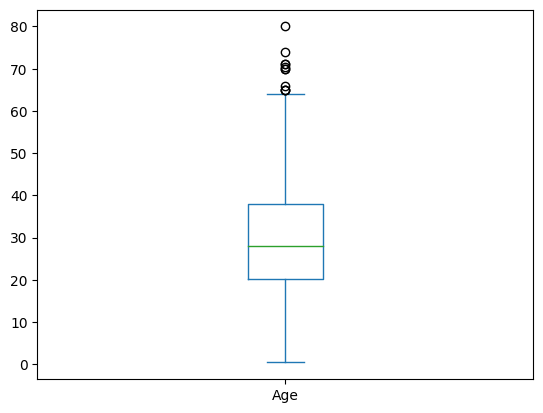

In [ ]:
data_numeric['Age'].plot(kind='box');

Наибольшее число пассажиров, плывущих на Титанике находились в возрасте от 20 до ~38 лет. Медианный возраст находится на уровне 29 лет. Судя по усам диаграммы на корабле также присутствовали как более молодые, так и более пожилые пассажиры. Однако найти пассажира возрастом более 66 лет считалось редкостью, т.к. в данных информации о таковых пассажирах крайне мало

In [ ]:
data_object = data.select_dtypes(include='object')
data_object.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


Получаем информацию о текстовых данных

In [ ]:
data_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: object(5)
memory usage: 34.9+ KB


In [ ]:
data_object = data_object.drop(['Cabin'], axis=1)
data_object.head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


Уникальные значения признака Name

In [ ]:
data_object['Name'].value_counts()

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

In [ ]:
data_object = data_object.drop(['Name'], axis=1)
data_object.head()

,Sex,Ticket,Embarked
0,male,A/5 21171,S
1,female,PC 17599,C
2,female,STON/O2. 3101282,S
3,female,113803,S
4,male,373450,S


Работаем со значениями в Ticket

In [ ]:
tick_unique = data_object['Ticket'].nunique()
print(f'Количество уникальных значений для билета: {tick_unique}')

Количество уникальных значений для билета: 681


In [ ]:
data_object = data_object.drop(['Ticket'], axis=1)
data_object.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [ ]:
data_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Embarked  889 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


In [ ]:
data_object['Embarked'] = data_object['Embarked'].fillna(data_object['Embarked'].mode())

In [ ]:
data_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Embarked  889 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


In [ ]:
data_object['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [ ]:
data_object['Embarked'] = data_object['Embarked'].replace(np.nan, 0)

In [ ]:
data_object['Embarked'].value_counts(dropna=False)

Embarked
S    644
C    168
Q     77
0      2
Name: count, dtype: int64

In [ ]:
data_object['Embarked'] = data_object['Embarked'].replace(0, 'S')
data_object['Embarked'].value_counts(dropna=False)

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [ ]:
data_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Embarked  891 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


In [ ]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [ ]:
data_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Embarked  891 non-null    object
dtypes: object(2)
memory usage: 14.0+ KB


In [ ]:
data = data_object.join(data_numeric)
data.head()

,Sex,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
0,male,S,0,3,22.0,1,0,7.2500
1,female,C,1,1,38.0,1,0,71.2833
2,female,S,1,3,26.0,0,0,7.9250
3,female,S,1,1,35.0,1,0,53.1000
4,male,S,0,3,35.0,0,0,8.0500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Embarked  891 non-null    object 
 2   Survived  891 non-null    int64  
 3   Pclass    891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
age = round(data['Age'].mean())
data['Age'] = data['Age'].fillna(age)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Embarked  891 non-null    object 
 2   Survived  891 non-null    int64  
 3   Pclass    891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Сохраняем данные

In [ ]:
data.to_csv('preprocessed_titanic.csv', index=False)

На дальнейшее изучение:

1. Корреляция данных
2. Объединение данных (join, concat, merge)
3. Заполнение значений в признаках с помощью *fillna*, *replace*
4. Визуализация данных: круговая диаграмма, столбчатая диаграммы (гистограмма), диаграмма рассеяния и ее применение в корреляции данных, коробчатая диаграмма (диаграмма с усами), построение линейных графиков
5. **ПО ЖЕЛАНИЮ:** Параметрические и непараметрические тесты

Библиотеки:
* numpy, pandas - для работы с данными
* matplotlib, seaborn - визуализация
* scipy, statsmodels - статистика, обработка данных
* sklearn - базовое машинное обучение (ML)